In [0]:
import os, sys
#from IPython.display import display
#from PIL import Image
import numpy as np
#from time import time
#from time import sleep
import cv2
#from IPython.display import Image as _Imgdis
import matplotlib.pyplot as plt
import glob

In [2]:
!pip3 install q keras==2.0.5

     |████████████████████████████████| 225kB 2.0MB/s 
  Created wheel for keras: filename=Keras-2.0.5-cp36-none-any.whl size=253392 sha256=5c7b74016aaac0973354109a729a18d969576e5695b5ff26c6550ef427dd7bb4
  Stored in directory: /root/.cache/pip/wheels/ee/09/df/2f10a3b36c903a620183396e24452e7de4dba01861b1d87cea
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.5 which is incompatible.
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [3]:
!pip3 install tensorflow==1.13.2

     |████████████████████████████████| 92.6MB 44kB/s 
     |████████████████████████████████| 368kB 39.5MB/s 
     |████████████████████████████████| 3.2MB 48.0MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#folder='/home/aj/02'
#onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
#print("Working with {0} images".format(len(onlyfiles)))

In [0]:
X = []
files = glob.glob ("/content/drive/My Drive/dynamic/*.png")  #Type location here
for myFile in files:
    #print(myFile)
    image = cv2.imread (myFile)
    image=cv2.resize(image, (320,240), interpolation=cv2.INTER_CUBIC)
    X.append (image)

#print('Array shape:', np.array(X).shape)
X=np.array(X)
#print(X[0])
#print(X.shape)
#plt.imshow(X[0])
#print(X.dtype)
np.max(X)
X=X/np.max(X)
#print(X[0])
#print(np.max(X))

In [0]:
#print(onlyfiles[0])
#display(_Imgdis(folder + "/" + onlyfiles[0], width=240, height=320))

In [0]:
print(X.shape)
ntrain=X
ntest=X
print(ntrain.shape)
print(ntest.shape)

(775, 240, 320, 3)
(775, 240, 320, 3)
(775, 240, 320, 3)


In [0]:
#from __future__ import division
#import numpy as np
#import matplotlib.pyplot as plt
#import os
import math
#import cv2
import pylab as pla
import re
import tensorflow as tf
import keras.backend.tensorflow_backend as ktf
from scipy.stats import norm
from keras.layers import Input, Dense, Lambda, Conv2D, Deconv2D, MaxPooling2D, UpSampling2D, Deconvolution2D, Flatten, ZeroPadding2D, merge
#from keras.layers.convolutional import Deconv2D
from keras.models import Sequential
from keras.models import Model
from keras.regularizers import l2
from keras import backend as K
from keras import objectives
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras import callbacks

Using TensorFlow backend.


ModuleNotFoundError: ignored

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
session = tf.Session(config=config)
ktf.set_session(session)

batch_size = 16
h = 240
w = 320
channel = 3
m_ori = 6
n = 30 * 40 * 8
dim = 80 * 60 * 3
hidden_h = 30
hidden_w = 40
hidden_c = 8
hidden_dim1 = 256
hidden_dim = 128
epsilon_std = 1.0
use_loss = 'mse' # 'mse' or 'xent'
decay = 1e-4 # weight decay, a.k. l2 regularization
use_bias = True


np.random.seed(1111) 

In [0]:
#def fixed_generator(generator):
#    for batch in generator:
#        yield (batch, batch)

In [0]:
############################################# original network #######################################
## Encoder
#import pdb;pdb.set_trace()
leakyrelu = LeakyReLU(alpha=0.05)
x = Input(shape=(h, w, channel))
cnn_1 = Conv2D(nb_filter=64, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN1')(x)
cnn_1 = Conv2D(nb_filter=64, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN2')(cnn_1)
max_1 = MaxPooling2D(pool_size=(2, 2), border_mode='same', name='max1')(cnn_1)#(?, 120, 160, 64) 
#pad_2 = ZeroPadding2D(padding=(0, 1))(max_1) #This is used in local detection

cnn_2 = Conv2D(nb_filter=32, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN3')(max_1)#pad_2  #(?, 120, 160, 32) 
cnn_2 = Conv2D(nb_filter=32, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN4')(cnn_2)
max_2 = MaxPooling2D(pool_size=(2, 2), border_mode='same', name='max2')(cnn_2)#(?, 60, 80, 32) 


cnn_3 = Conv2D(nb_filter=16, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN5')(max_2)#(?, 60, 80, 16)
cnn_3 = Conv2D(nb_filter=16, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN6')(cnn_3)
max_3 = MaxPooling2D(pool_size=(2, 2), border_mode='valid', name='max3')(cnn_3)#(?, 30, 40, 16)


cnn_4 = Conv2D(nb_filter=8, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN7')(max_3)
cnn_4 = Conv2D(nb_filter=8, nb_row=3, nb_col=3, border_mode='same', activation='relu', name='CNN8')(cnn_4)#(?, 30, 40, 8) 

flat = Flatten()(cnn_4)
h_encoded = Dense(hidden_dim1, W_regularizer=l2(decay), b_regularizer=l2(decay),  activation='relu', name='Dense1_vae')(flat)  #use_bias=use_bias,
h_encoded = Dense(hidden_dim, W_regularizer=l2(decay), b_regularizer=l2(decay), activation='relu', name='Dense2_vae')(h_encoded)
z_mean = Dense(m_ori, W_regularizer=l2(decay), b_regularizer=l2(decay), name='Dense_mean_vae')(h_encoded)
z_log_var = Dense(m_ori, W_regularizer=l2(decay), b_regularizer=l2(decay), name='Dense_sigma_vae')(h_encoded)

## Sampler
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal_variable(shape=(m_ori, ), mean=0.,
                                       scale=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(m_ori,), name='Lambda')([z_mean, z_log_var])#(?, 6)

# Initialize
decoder_h1 = Dense(hidden_dim, W_regularizer=l2(decay), b_regularizer=l2(decay), activation='relu', name='Dense3_vae')
decoder_h = Dense(hidden_dim1, W_regularizer=l2(decay), b_regularizer=l2(decay), activation='relu', name='Dense4_vae')
decoder_mean = Dense(n, W_regularizer=l2(decay), b_regularizer=l2(decay),  activation='tanh', name='Dense5_vae')

## Decoder
h_decoded1 = decoder_h1(z)
h_decoded = decoder_h(h_decoded1)
x_hat = decoder_mean(h_decoded)


def dense2conv(args):
    x_hat = args
    return K.reshape(x_hat, (-1, hidden_h, hidden_w, hidden_c))

dense_out = Lambda(dense2conv, name='Lambda2')(x_hat)#(?, 30, 40, 8)


mer_5 = merge([Conv2D(16, 2, 2, activation='relu', border_mode='same', name='mer5_CNN')(UpSampling2D(size=(2, 2), name='upsam_5')(dense_out)), cnn_3], mode='concat', concat_axis=3, name='mer_5')#(?, 60, 80, 32)
cnn_5 = Conv2D(32, 3, 3, activation='relu', border_mode='same', name='cnn5')(mer_5)
cnn_5 = Conv2D(32, 3, 3, activation='relu', border_mode='same', name='cnn5.2')(cnn_5)

mer_6 = merge([Conv2D(32, 2, 2, activation='relu', border_mode='same', name='mer6_CNN')(UpSampling2D(size=(2, 2), name='upsam_6')(cnn_5)), cnn_2], mode='concat', concat_axis=3, name='mer_6')#(?, 120, 160, 64) 
cnn_6 = Conv2D(64, 3, 3, activation='relu', border_mode='same', name='cnn6')(mer_6)
cnn_6 = Conv2D(64, 3, 3, activation='relu', border_mode='same', name='cnn6.2')(cnn_6)

mer_7 = merge([Conv2D(64, 2, 2, activation='relu', border_mode='same', name='mer7_CNN')(UpSampling2D(size=(2, 2), name='upsam_7')(cnn_6)), cnn_1], mode='concat', concat_axis=3, name='mer_7')#(?, 240, 320, 128)
cnn_7 = Conv2D(128, 3, 3, activation='relu', border_mode='same', name='cnn7')(mer_7)
cnn_7 = Conv2D(128, 3, 3, activation='relu', border_mode='same', name='cnn7.2')(cnn_7)

conv10 = Conv2D(channel, 1, 1, activation='relu', name='cnn8')(cnn_7)#(?, 240, 320, 1) 

## loss
def vae_loss(x, conv10):
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    xent_loss = objectives.binary_crossentropy(x, conv10)
    mse_loss = K.mean(K.square(x - conv10), axis=[1, 2, 3])
    mse_kl_loss = mse_loss + kl_loss
    if use_loss == 'xent':
        return xent_loss + kl_loss
    elif use_loss == 'mse':
        return mse_kl_loss


vae = Model(x, conv10)
vae.summary()

adam = Adam(lr=0.0001)
vae.compile(optimizer=adam, loss=vae_loss)
##------------------------------------------------------------------------------------------------------------

checkpoint = ModelCheckpoint("/content/drive/My Drive/weight/loss_{loss_ty}".format(loss_ty=use_loss)+"_weight_{epoch:02d}-{val_loss:.15f}-{loss:.15f}.hdf5", verbose=0, save_best_only=True)

early_check = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')

board_check = TensorBoard(log_dir='./tmp/log')

#vae.fit(ntrain,ntrain,batch_size=batch_size,epochs=5,validation_data=(ntest,ntest),verbose=2)

autoencoder_train=vae.fit(ntrain, ntrain,
        shuffle=True,
        nb_epoch=1000,
        batch_size=batch_size,
        validation_data=(ntest, ntest),
        verbose=2,
        callbacks=[checkpoint, early_check, board_check])

#vae.fit_generator(dataAugmentaion.flow(ntrain, ntrain, batch_size = 16),
#        validation_data = (ntrain, ntrain), steps_per_epoch = len(ntrain) // 32,
#        epochs = 10)

##-----------------------------------------------------------------------------------------------------------------






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", name="CNN1", kernel_size=(3, 3), filters=64, padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", name="CNN2", kernel_size=(3, 3), filters=64, padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), name="max1", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", name="CNN3", kernel_size=(3, 3), filters=32, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipy


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 240, 320, 3)   0                                            
____________________________________________________________________________________________________
CNN1 (Conv2D)                    (None, 240, 320, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
CNN2 (Conv2D)                    (None, 240, 320, 64)  36928       CNN1[0][0]                       
____________________________________________________________________________________________________
max1 (MaxPooling2D)              (None, 120, 160, 64)  0           CNN2[0][0]                       
__________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (2, 2), activation="relu", name="mer5_CNN", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name="cnn5", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), ac


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Train on 775 samples, validate on 775 samples





Epoch 1/1000

68s - loss: 0.1612 - val_loss: 0.0891
Epoch 2/1000
56s - loss: 0.0725 - val_loss: 0.0579
Epoch 3/1000
56s - loss: 0.0486 - val_loss: 0.0403
Epoch 4/1000
57s - loss: 0.0349 - val_loss: 0.0300
Epoch 5/1000
57s - loss: 0.0268 - val_loss: 0.0238
Epoch 6/1000
58s - loss: 0.0218 - val_loss: 0.0199
Epoch 7/1000
57s - loss: 0.0184 - val_loss: 0.0170
Epoch 8/1000
57s - loss: 0.0159 - val_loss: 0.0149
Epoch 9/1000
58s - loss: 0.0140 - val_loss: 0.0131
Epoch 10/1000
58s - loss: 0.0123 - val_loss: 0.0115
Epoch 11/1000
58s - loss: 0.0108 - val_loss: 0.0101
Epoch 12/1000
58s - loss: 0.0095 - val_loss: 0.0089
Epoch 13/1000
57s - loss: 0.0084 - val_loss: 0.0079
Epoch 14/1000
58s - loss: 0.0074 - val_loss: 0.0069
Epoch 15/1000
58s - loss: 0.0065 - val_loss: 0.0060
Epoch 16/1000
58s - loss: 0.0057 - val_loss: 0.0053
Epoch

['/content/drive/My Drive/image/abc.png']
(1, 240, 320, 3)


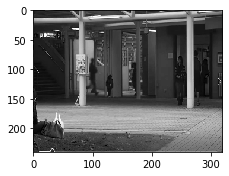

Reconstruction of Test Images


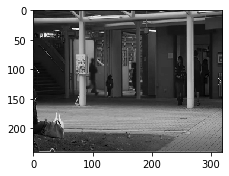

[0.16723313140017645, 0.07721629883561816, 0.05328636642013277, 0.03881683177181652, 0.029918768405914307, 0.024268426533256258, 0.02048428479049887, 0.017761405227439745, 0.015647617094218733, 0.013900498550917422, 0.012393183335661887, 0.011067976568426405, 0.009877748052988734, 0.008808543384075164, 0.007848532763975007, 0.006986491299633469, 0.006210676884012563, 0.005515562572649547, 0.004889618211558887, 0.004331022394554956, 0.0038308370219809667, 0.003387021995814783, 0.0029858763835259846, 0.0026333392078855206, 0.002318742416266884, 0.002038006754592061, 0.0017924660850050195, 0.0015721022969643985, 0.001407692669890821, 0.001211548125637429, 0.0010587650178266422, 0.0009268335978101406, 0.0008111406144286905, 0.0007096724445000291, 0.0006208178444233324, 0.0005434559714714331, 0.0004766337413872991, 0.00041629309533163905, 0.00036437515335689696, 0.00031931523582898083, 0.00028532230195456315, 0.00024970806877328347, 0.00021797291809759503, 0.00018980335760196404, 0.00016697

In [0]:
files = glob.glob ("/content/drive/My Drive/image/abc.png")  #Type location here
print(files)
test_data=[]
for myFile in files:
    #print(myFile)
    image = cv2.imread (myFile)
    image=cv2.resize(image, (320,240), interpolation=cv2.INTER_CUBIC)
    test_data.append (image)
test_data=np.array(test_data)
test_data=test_data/np.max(test_data)

pred = vae.predict(test_data)
print(pred.shape) 



plt.figure(figsize=(40, 6)) 
for i in range(1):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(40, 6))
print("Reconstruction of Test Images")
for i in range(1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

print(autoencoder_train.history['loss'])

In [0]:
l=-0
x=0
for y in range(1,775):
   los=vae.evaluate(ntrain[x:y],ntrain[x:y])
   x=x+1
   if los>l:
     l=los
     print(los)
if los>3.7765282857231796e-05:
  print("Abnormal")
else:
  print("normal")

1/1 [==============================] - 0s
2.2593715129914926e-06
1/1 [==============================] - 0s
3.0007872737769503e-06
1/1 [==============================] - 0s
3.3526421248097904e-06
1/1 [==============================] - 0s
3.7496499771805247e-06
1/1 [==============================] - 0s
4.55316694569774e-06
1/1 [==============================] - 0s
4.846302999794716e-06
1/1 [==============================] - 0s
5.342466920410516e-06
1/1 [==============================] - 0s
5.399214387580287e-06
1/1 [==============================] - 0s
3.6765282857231796e-05
1/1 [==============================] - 0s
normal


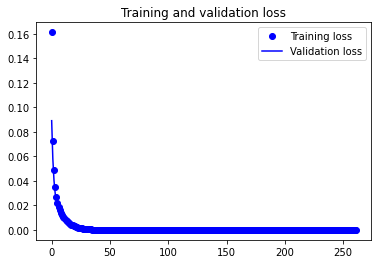

In [0]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(262)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()